In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

In [3]:
df = pd.read_csv("economic_index.csv")

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
#dropping unnecessary columns
df.drop(columns = ["Unnamed: 0", "year", "month"], axis = 1, inplace = True)

In [8]:
#checkin null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [33]:
#doing visualization
import seaborn as sns
sns.pairplot(df)

ModuleNotFoundError: No module named 'seaborn'

In [34]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

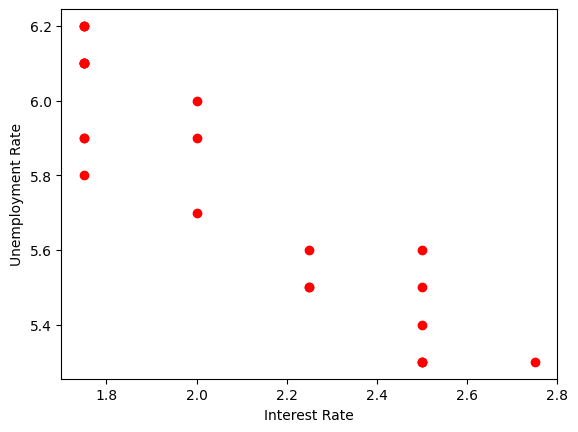

In [35]:
#visualizing them more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')


In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [38]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_test

array([[ 0.55339859, -0.84858687],
       [-0.9486833 ,  1.36439457],
       [ 2.05548048, -1.48086727],
       [-0.9486833 ,  1.04825436],
       [-0.19764235,  0.41597395]])

In [43]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [44]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [46]:
# prediction
y_pred=regression.predict(X_test)

In [47]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6957.105303258833
71.71878409976625
83.40926389351985
